# Interactive calls of Simulations

This notebook illustrates how to use simulations in TeNPy.
Simulations are designed to be "complete" runs of what you might want to do on a computing cluster, 
but you can also use them interactively.

See also the (userguide on simulations)[https://tenpy.readthedocs.io/en/latest/intro/simulations.html] in the documentation!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=5, suppress=True, linewidth=100)
plt.rcParams['figure.dpi'] = 150

In [2]:
import tenpy

In [3]:
sim_params = {
    'algorithm_class': 'TwoSiteDMRGEngine',
    'algorithm_params': {
        'trunc_params': {
            'chi_max': 100,
            'svd_min': 1.e-6,
        },
    },
    'model_class': 'XXZChain',
    'model_params': {
        'Jxx': 1.,
        'Jz': 1.2,   
        'bc_MPS': 'finite',
        'L': 12,
    },
    'initial_state_params': {
        'method': 'lat_product_state',
        'product_state': [['up'], ['down']]
    },
}


In [4]:
# it can be more convenient to use yaml, as you would in parameter files:
import yaml
sim_params = yaml.safe_load("""
algorithm_class: TwoSiteDMRGEngine
algorithm_params:
    trunc_params:
        chi_max: 100
        svd_min: 1.e-06
model_class: XXZChain
model_params:
    Jxx: 1.0
    Jz: 1.2
    L: 12
    bc_MPS: finite
initial_state_params:
    method: lat_product_state
    product_state: [[up], [down]]
""")

In [5]:
# this runs the simulations, so it takes a while
data = {}
for L in [2**i for i in range(4, 8)]:
    print("+"*80)
    print("L=", L)
    sim_params['model_params']['L'] = L
    # the with statement works similar as for open files
    # (for the same reason: make sure we can free resources after use)
#     with GroundStateSearch(sim_params) as sim:
#         data[L] = sim.run()
    # alternatively, you can just call
    data[L] = tenpy.run_simulation(**sim_params)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
L= 16
INFO    : new simulation
GroundStateSearch
INFO    : output filename: None
INFO    : GroundStateSearch: reading 'algorithm_params'={'trunc_params': {'chi_max': 100, 'svd_min': 1e-06}}
INFO    : GroundStateSearch: reading 'model_class'='XXZChain'
INFO    : GroundStateSearch: subconfig 'model_params'=Config(<4 options>, 'model_params')
INFO    : model_params: reading 'L'=16
INFO    : model_params: reading 'Jxx'=1.0
INFO    : model_params: reading 'Jz'=1.2
INFO    : model_params: reading 'bc_MPS'='finite'
INFO    : GroundStateSearch: subconfig 'initial_state_params'=Config(<2 options>, 'initial_state_params')
INFO    : initial_state_params: reading 'method'='lat_product_state'
INFO    : calling InitialStateBuilder.lat_product_state()
INFO    : initial_state_params: reading 'product_state'=[['up'], ['down']]
INFO    : GroundStateSearch: reading 'algorithm_class'='TwoSiteDMRGEngine'
INFO    : algorithm_pa

INFO    : Running sweep with optimization
INFO    : checkpoint after sweep 5
energy=-14.9573403706178905, max S=0.8452635548972184, age=32, norm_err=2.7e-09
Current memory usage 149.0MB, wall time: 1.1s
Delta E = -9.5035e-13, Delta S = 4.6968e-08 (per sweep)
max trunc_err = 9.8489e-12, max E_trunc = 4.3139e-11
chi: [2, 4, 8, 16, 32, 38, 46, 50, 54, 56, 58, 60, 62, 60, 64, 63, 64, 60, 62, 60, 58, 56, 54, 50, 46, 38, 32, 16, 8, 4, 2]
INFO    : algorithm_params: reading 'norm_tol'=1e-05
INFO    : algorithm_params: reading 'norm_tol_final'=1e-10
INFO    : DMRG finished after 5 sweeps, max chi=64
INFO    : make measurements
INFO    : finished simulation run
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
L= 64
INFO    : new simulation
GroundStateSearch
INFO    : output filename: None
INFO    : GroundStateSearch: reading 'algorithm_params'={'trunc_params': Config(<5 options>, 'trunc_params'), 'diag_method': 'default', 'combine': False, 'lanczos_params': Confi

INFO    : make measurements
INFO    : algorithm_params: reading 'P_tol_to_trunc'=0.05
INFO    : algorithm_params: reading 'P_tol_min'=5e-14
INFO    : algorithm_params: reading 'P_tol_max'=0.0001
INFO    : algorithm_params: reading 'E_tol_to_trunc'=None
INFO    : algorithm_params: reading 'N_sweeps_check'=1
INFO    : algorithm_params: reading 'min_sweeps'=1
INFO    : algorithm_params: reading 'max_sweeps'=1000
INFO    : algorithm_params: reading 'max_E_err'=1e-08
INFO    : algorithm_params: reading 'max_S_err'=1e-05
INFO    : algorithm_params: reading 'max_hours'=8760
INFO    : algorithm_params: reading 'mixer'=None
INFO    : Running sweep with optimization
INFO    : algorithm_params: reading 'chi_list_reactivates_mixer'=True
INFO    : algorithm_params: reading 'max_N_for_ED'=400
INFO    : checkpoint after sweep 1
energy=-60.1165323079136513, max S=0.5542315344546935, age=128, norm_err=4.3e-01
Current memory usage 159.5MB, wall time: 2.0s
Delta E = nan, Delta S = 3.7185e-01 (per sweep)


In [6]:
print(data[32].keys())
print(data[32]['measurements'].keys())

dict_keys(['simulation_parameters', 'version_info', 'finished_run', 'psi', 'sweep_stats', 'update_stats', 'measurements', 'energy', 'resume_data'])
dict_keys(['measurement_index', 'bond_dimension', 'energy_MPO', 'entropy'])


In [7]:
Ls = np.array(list(data.keys()))
Es = np.array([data[L]['energy'] for L in Ls])

In [8]:
Es/Ls

array([-0.46153, -0.46742, -0.47049, -0.47206])

In [9]:
coeffs = np.polyfit(1./Ls, Es/Ls, 2)
E0_inf = coeffs[-1]
print("E/L [L->inf] =", E0_inf)

E/L [L->inf] = -0.47364442364092396


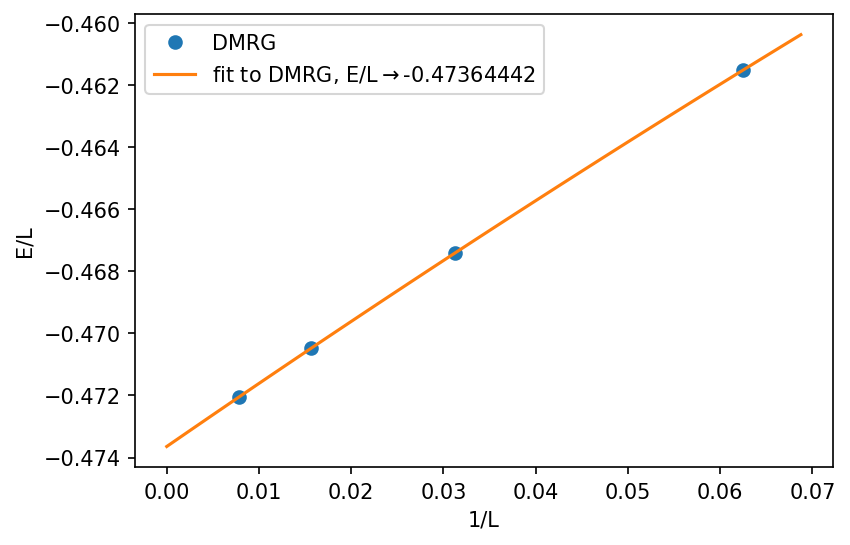

In [10]:
plt.plot(1/Ls, Es/Ls, 'o', label='DMRG')
plt.xlabel('1/L')
plt.ylabel('E/L')

inv_L = np.linspace(0., np.max(1./Ls) * 1.1, 30)
plt.plot(inv_L, np.poly1d(coeffs)(inv_L), label=f"fit to DMRG, E/L$\\rightarrow${E0_inf:.8f}")
plt.legend()

## Compare that to infinite DMRG

In [11]:
sim_params = yaml.safe_load("""
algorithm_class: TwoSiteDMRGEngine
algorithm_params:
    trunc_params:
        chi_max: 100
        svd_min: 1.e-06
model_class: XXZChain
model_params:
    Jxx: 1.0
    Jz: 1.2
    L: 2
    bc_MPS: infinite
initial_state_params:
    method: lat_product_state
    product_state: [[up], [down]]
""")

In [12]:
data_inf = tenpy.run_simulation(**sim_params)

INFO    : new simulation
GroundStateSearch
INFO    : output filename: None
INFO    : GroundStateSearch: reading 'algorithm_params'={'trunc_params': {'chi_max': 100, 'svd_min': 1e-06}}
INFO    : GroundStateSearch: reading 'model_class'='XXZChain'
INFO    : GroundStateSearch: subconfig 'model_params'=Config(<4 options>, 'model_params')
INFO    : model_params: reading 'L'=2
INFO    : model_params: reading 'Jxx'=1.0
INFO    : model_params: reading 'Jz'=1.2
INFO    : model_params: reading 'bc_MPS'='infinite'
INFO    : GroundStateSearch: subconfig 'initial_state_params'=Config(<2 options>, 'initial_state_params')
INFO    : initial_state_params: reading 'method'='lat_product_state'
INFO    : calling InitialStateBuilder.lat_product_state()
INFO    : initial_state_params: reading 'product_state'=[['up'], ['down']]
INFO    : GroundStateSearch: reading 'algorithm_class'='TwoSiteDMRGEngine'
INFO    : algorithm_params: subconfig 'trunc_params'=Config(<2 options>, 'trunc_params')
INFO    : start env

In [13]:
E_iDMRG = data_inf['energy']
print("E_iDMRG = ", E_iDMRG)

E_iDMRG =  -0.47365599058122143


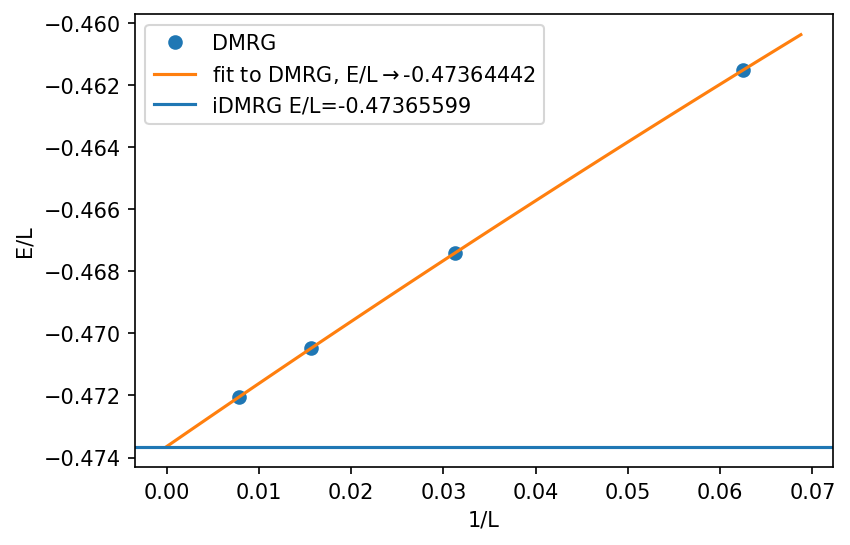

In [14]:
plt.plot(1/Ls, Es/Ls, 'o', label='DMRG')
plt.xlabel('1/L')
plt.ylabel('E/L')

inv_L = np.linspace(0., np.max(1./Ls) * 1.1, 30)
plt.plot(inv_L, np.poly1d(coeffs)(inv_L), label=f"fit to DMRG, E/L$\\rightarrow${E0_inf:.8f}")

plt.axhline(y=E_iDMRG, label=f"iDMRG E/L={E_iDMRG:.8f}")
plt.legend()
